# Calculating $k_{A,R}$ for 1b

The kinetic data for the unsubstituted reactant was not reported in the 2006 paper but is presented in work from 2002. The experiment was also reported at a different temperature (293K) so we will have to recalulate all the rates for 313K. 

The data was found in the supplemental material for...

"The First Kinetic Evidence for Acid Catalysis in a Monocyclic Rearrangement of Heterocycles:  Conversion of the Z-Phenylhydrazone of 5-Amino-3-benzoyl-1,2,4-oxadiazole into N,5-Diphenyl-2H-1,2,3-triazol-4-ylurea." B. Cosimelli, V. Frenna, S. Guernelli, C.Z. Lanza, G. Macaluso, G. Petrillo, D. Spinelli, J. Org. Chem., 2002, 67, 8010-8018. https://doi.org/10.1021/jo026039z

The data was entered into a csv file titled "1b-data_thermo.csv"

We will calulate the rates using the Erying equation

$$k = \frac{\kappa k_B T}{h}e^{\frac{\Delta S^{\ddagger}}{R}}e^{\frac{-\Delta H^{\ddagger}}{RT}}$$

Then we will export the columns of $pS^+$ and $k_{(A,R)}\times 10^5$ to a csv file named "1b-data_calc.csv"

This file will be edited and annotated using a text editor and saved as "1b-data.csv"

line [1.0278854]
Parameters for curve fit to kobs calculated from ACTIVATION PARAMETERS


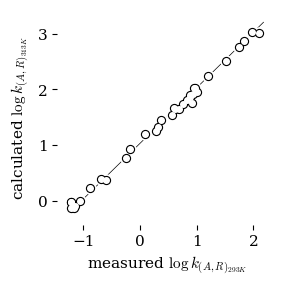

The slope of the log-log plot is 1.000

the intercept is 1.028
Therefore the calculated rates are (on average) 10.66 times faster


In [54]:
##############################################################
### Set up libraries and global variables
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.constants as constants  # a collection of scientific constants
from scipy.optimize import curve_fit


github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_23/data/"
#github_location = "./data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

datafile_name = "1b-data_thermo.csv"

##############################################################
### Read data for thermodynamic parameters
##############################################################

df = pd.read_csv(github_location + datafile_name, 
             delimiter = ",", 
             skipinitialspace=True, 
             index_col="pS+", 
             comment = "#") 

##############################################################
### calculate rate constants using Eyring equation
##############################################################

### Set up constants
T = 313.1
kappa = 1
kB = constants.Boltzmann
h = constants.h
R = constants.R
delta_H = df["delta_H"]*1000
delta_S = df["delta_S"]

### rename the result column in the data set to indicate that it is the measured data from the paper
df.rename(columns={"k(A,R)x10^5":"k(A,R)x10^5_measured"}, inplace = True)

### Calculate the rate constants using the Eyring equation
df["k(A,R)x10^5_Erying"] = (kappa * kB * T / h) * np.exp(delta_S / R) * np.exp(-delta_H / (R * T)) * 1E5

### Pull x and y data from the dataframe
x = np.log10(df["k(A,R)x10^5_measured"])
y = np.log10(df["k(A,R)x10^5_Erying"])

##############################################################
### Perform a linear regression line fit of x and y
##############################################################


if True:    # Force slope to 1.0


    def model1(x, int):    
        y = 1.0*x + int
        return(y)

    parameters, pcov = curve_fit(model1, x, y)  # Curve fit the model to the x,y data using bounding limits

    [int] = parameters  ### Assign the parameter list to values
    perr = np.sqrt(np.diag(pcov))     ### Determine standard deviations from covariance matrix
    
    print("line", parameters)
    print("Parameters for curve fit to kobs calculated from ACTIVATION PARAMETERS")

    slope = 1.0
    intercept = int

if False:  # use tradition linear reghression to fit bot slope and intercept

    fit = stats.linregress(x,y)    ### This is the line fit
    
    slope = fit.slope
    intercept = fit.intercept

### Create a line to plot from the slope and intercept
start = np.min(x)
finish = np.max(x)
x1 = np.arange(start, finish + 0.1, 0.1)
fity = slope*x1 + intercept

##############################################################
### Output plot and results
##############################################################

### Set plot style
style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

### Set figure layout (fig) that contains the plot (ax)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  

### Set margins around the plot (ax)
ax.margins(x=.07, y=.07, tight=True)

### Set axis labels and ranges for the plot (ax)
ax.set(
#    title="None",
          ylabel=r"calculated $\log{k_{(A,R)_{313K}}}$", 
          xlabel=r"measured $\log{k_{(A,R)_{293K}}}$", 
#          xlim=[-.9,.9], 
#          ylim=[-3.7,-2.7]
         )

### Plot the line fit. (zorder = 3 will be in front of zorder = 1)
ax.plot(x1, fity, color='black', zorder=1, linewidth=0.5)

### Plot the data as a series of stacked data points to create 
### the appearance of open circles with a white margin
ax.scatter(x,y, s=64, color="white", marker='o', zorder=3)
ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)

### Save the figure containing the plot and show the plot in this notebook]
fig.savefig("plot_1b_calc.pdf")   # use this to save the figure in PDF format
plt.show()

### Display the results
print(f"The slope of the log-log plot is {slope:0.3f}")
print()
print(f"the intercept is {intercept:0.3f}")
print(f"Therefore the calculated rates are (on average) {10**intercept:0.2f} times faster")


#
# display(df)

## Conversion of rates from 293.15K to 313.15K

I could take the $k_{(A,R)}\times 10^5$ that were calculated at 313K from the thermodynamic parameters and use them in a curve fit of the pH-rate profile. The calculated data is a bit choppy compared to the measured data. The thermodynamic values of $\Delta H^\ddagger$ and $\Delta S^\ddagger$ were reported to only two digits of precision.   

On average across the range of pH values the reaction at 313K is 9.13 $\times$ faster than the reaction at 213K as determined from the slope of the line of calculated vs measured rates.

So for a better plot we will export our adjusted rate data by multiplying the rates at 213K by 9.13 to get the rates at 313K.

In [47]:
##############################################################
### make dataset for substituent = H data at 313K (calculated from 213K data set)
##############################################################

### The factor to multiply rates was determined above
factor = 10**intercept

### make a column with the same naming convention as all the other data sets
df["k(A,R)x10^5"] = df["k(A,R)x10^5_measured"] * factor

### Create a new dataframe with only the information needed
df2 = df[['k(A,R)x10^5', 'BUFFER']]

### Write that new dataframe out as a data file
filename = "1b-data2.csv"
df2.to_csv("./data/" + filename, float_format="%0.2f")

#display(df2)

## Plotting the Two calculated Result Together

Above we produced a plot of the calculated results at $313K$ from activation parameters and the recorded rates at $293K$.  The intercept would be the difference in magnitude between the two lines and resulted in a conversion factor of $10.66$

The code below generates a plot of the pH-rate profile using both the rate constants calculated for 313K from activation parameters and the rate constants calculated for 313K using the factor of 10.66 applied to the experimental rates at 293K.

We see that bot data sets produce very similar values. I will be using the data set for the pH-rate profile generated using the multiplication factor for the rate in the subsequent analyses.

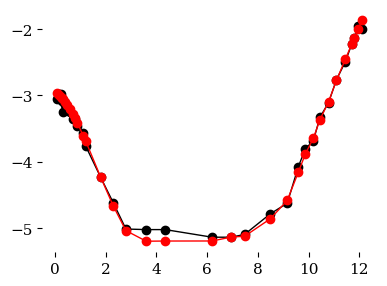

In [48]:
pH = df.index
y_byEyring = np.log10(df["k(A,R)x10^5_Erying"]/100000)
y_byfactor = np.log10(df2["k(A,R)x10^5"]/100000)

#y_byEyring = df["k(A,R)x10^5_Erying"]
#y_byfactor = df2["k(A,R)x10^5"]


plt.plot(pH,y_byEyring,"o-k")
plt.plot(pH,y_byfactor,"o-r")

y1 [4.70659587e-01 1.29200568e+00 8.13846117e-06 1.55562302e-03]
Parameters for curve fit to kobs calculated from ACTIVATION PARAMETERS
Ka = 0.47 pm 0.13
kOH = 1.29 pm 0.0751
kH2O = 8.14E-06 pm 6.67E-07
kH = 0.00156 pm 0.000286
pKa = 0.33
Parameters for curve fit to kobs calculated from EXPERIMENTAL rates multiplied by the FACTOR
y2 [5.59327509e-01 1.31077727e+00 6.61744969e-06 1.90802457e-03]
Ka = 0.56 pm 0.1
kOH = 1.31 pm 0.0468
kH2O = 6.62E-06 pm 3.44E-07
kH = 0.00191 pm 0.000238
pKa = 0.25


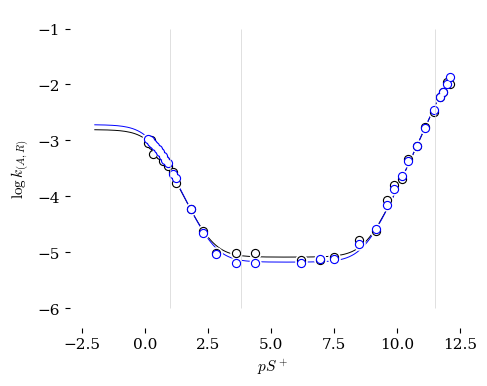

In [49]:
def model(pH, Ka = -1.0, kOH=1.0, kH2O = 1.0, kH = 1.0):    
    """
    model(x, Ka, kOH, kH2O, kH)
    pH is an array of pH values
    returns an array of log(k_obs) values
    """
    KW = 10**(-14)
    H = 10**(-pH)
    k_obs = (kOH * (KW/H) + kH2O + kH * (H/Ka))*(Ka/(Ka + H))
    return(np.log10(k_obs))


#####################################################
### Get series of data to plot from the dataframe 
#####################################################

x = pH
y1 = y_byEyring
y2 = y_byfactor


##################################################
### Setup a figure and choose a stylesheet     
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

############################
### Set labels and scale 
############################

ax.set(
#    title="pH rate profilr",       
          ylabel=r"$\log{k_{(A,R)}}$", 
          xlabel=r"$pS^+$",                
#          xlim=[-.25,.2],                  
#          ylim=[-6,-1]
         )




##################################################
### Curve Fit                                
##################################################

if True:

    ### Set bounds so rate consatnts are never negative and constrain Ka value if needed
    min_Ka = 0.01
    max_Ka = 10       # One data set will want infinite Ka value because of no curvature in that region. Limit max value.
    k_min = 0
    k_max = np.inf

    lower_bounds = [min_Ka, k_min, k_min, k_min]    # lower bounds for Ka, kOH, kH2O, kH
    upper_bounds = [max_Ka, k_max, k_max, k_max] # upper bounds for Ka but no upper bounds for kOH, kH2O, kH
    bounds_list = (lower_bounds, upper_bounds)

    ### Perform the curve fit. Will return a list of parameters and an array of statistical info.
    parameters, pcov = curve_fit(model, x, y1, bounds = bounds_list)  # Curve fit the model to the x,y data using bounding limits

    [Ka, kOH, kH2O, kH] = parameters  ### Assign the parameter list to values
    perr = np.sqrt(np.diag(pcov))     ### Determine standard deviations from covariance matrix
    
    print("y1", parameters)
    print("Parameters for curve fit to kobs calculated from ACTIVATION PARAMETERS")

    ################################################################
    ### make a line from the parameters and the model            
    ### this would be the line of the curve fit when plotted     
    ################################################################

    step = 0.1
    #x1 = np.arange(np.min(x), np.max(x)+step, step)
    x1 = np.arange(-2, 12 + step, step)     # make an array of points to calculate y-values from
    fity = model(x1, Ka, kOH, kH2O, kH)     # Calculate those y-values using the model

    #########################################
    ### Plot the line fit.                
    #########################################
    if True:
        ax.plot(x1, fity, color='black', zorder=0, linewidth=0.7)

        #######################################################
        ### Print out Parameters and standard deviations    
        #######################################################

        print(f"Ka = {Ka:0.2G} pm {perr[0]:0.2G}")
        print(f"kOH = {kOH:0.3G} pm {perr[1]:0.3G}")
        print(f"kH2O = {kH2O:0.3G} pm {perr[2]:0.3G}")
        print(f"kH = {kH:0.3G} pm {perr[3]:0.3G}")
        print(f"pKa = {-np.log10(Ka):0.2f}")






if True:

    ### Set bounds so rate consatnts are never negative and constrain Ka value if needed
    min_Ka = 0.01
    max_Ka = 10       # One data set will want infinite Ka value because of no curvature in that region. Limit max value.
    k_min = 0
    k_max = np.inf

    lower_bounds = [min_Ka, k_min, k_min, k_min]    # lower bounds for Ka, kOH, kH2O, kH
    upper_bounds = [max_Ka, k_max, k_max, k_max] # upper bounds for Ka but no upper bounds for kOH, kH2O, kH
    bounds_list = (lower_bounds, upper_bounds)

    ### Perform the curve fit. Will return a list of parameters and an array of statistical info.
    parameters, pcov = curve_fit(model, x, y2, bounds = bounds_list)  # Curve fit the model to the x,y data using bounding limits

    [Ka, kOH, kH2O, kH] = parameters  ### Assign the parameter list to values
    perr = np.sqrt(np.diag(pcov))     ### Determine standard deviations from covariance matrix
    
    print("Parameters for curve fit to kobs calculated from EXPERIMENTAL rates multiplied by the FACTOR")
    print("y2", parameters)


    ################################################################
    ### make a line from the parameters and the model            
    ### this would be the line of the curve fit when plotted     
    ################################################################

    step = 0.1
    #x1 = np.arange(np.min(x), np.max(x)+step, step)
    x1 = np.arange(-2, 12 + step, step)     # make an array of points to calculate y-values from
    fity = model(x1, Ka, kOH, kH2O, kH)     # Calculate those y-values using the model

    #########################################
    ### Plot the line fit.                
    #########################################
    if True:
        ax.plot(x1, fity, color='blue', zorder=0, linewidth=0.7)
    
        #######################################################
        ### Print out Parameters and standard deviations    
        #######################################################
    
        print(f"Ka = {Ka:0.2G} pm {perr[0]:0.2G}")
        print(f"kOH = {kOH:0.3G} pm {perr[1]:0.3G}")
        print(f"kH2O = {kH2O:0.3G} pm {perr[2]:0.3G}")
        print(f"kH = {kH:0.3G} pm {perr[3]:0.3G}")
        print(f"pKa = {-np.log10(Ka):0.2f}")

ax.scatter(x,y2, s=64, color="white", zorder=2)
ax.scatter(x,y1, s=64, color="white", zorder=2)

ax.scatter(x,y1, s=32, color="black", zorder=2)
ax.scatter(x,y1, s=16, color="white", alpha = 1.0, zorder=2)


ax.scatter(x,y2, s=32, color="blue", zorder=2)
ax.scatter(x,y2, s=16, color="white", alpha = 1.0, zorder=2)



#########################################
### Plot the data                     
#########################################


plt.vlines([1,3.8,11.5],-6,-1, colors = "lightgray", linewidth = 0.5)



#############################
### Output the final plot 
#############################

fig.savefig("plot_1b_calc_pH.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

